In [1]:
#importing modules
import pandas as pd
from preprocessing import Preprocessing
# from model import Modelling

/home/ghost/anaconda3/lib/python3.9/zoneinfo/_tzpath.py:44: InvalidTZPathWarning: Invalid paths specified in PYTHONTZPATH environment variable. Paths should be absolute but found the following relative paths:
     /run/media/ghost/STORAGE1/System-Application/anaconda3/share/zoneinfo
     /run/media/ghost/STORAGE1/System-Application/anaconda3/share/tzinfo
  warnings.warn(


In [5]:
#defininig variables
categorical_cols = ['round', 'day', 'venue', 'result', 'opponent', 'captain', 'formation', 'referee', 'pk', 'pkatt', 'season', 'team']
numerical_cols = ['xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist']
features = ['round', 'day', 'venue', 'opponent', 'captain', 'formation', 'referee', 'pk', 'pkatt', 'season', 'team', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist']
target = 'result'

<---------------Missing values before temporal imputation---------------->
<---------------Missing values after temporal imputation---------------->
<---------------Missing values after dropping rows with missing values---------------->


<Figure size 1200x800 with 0 Axes>

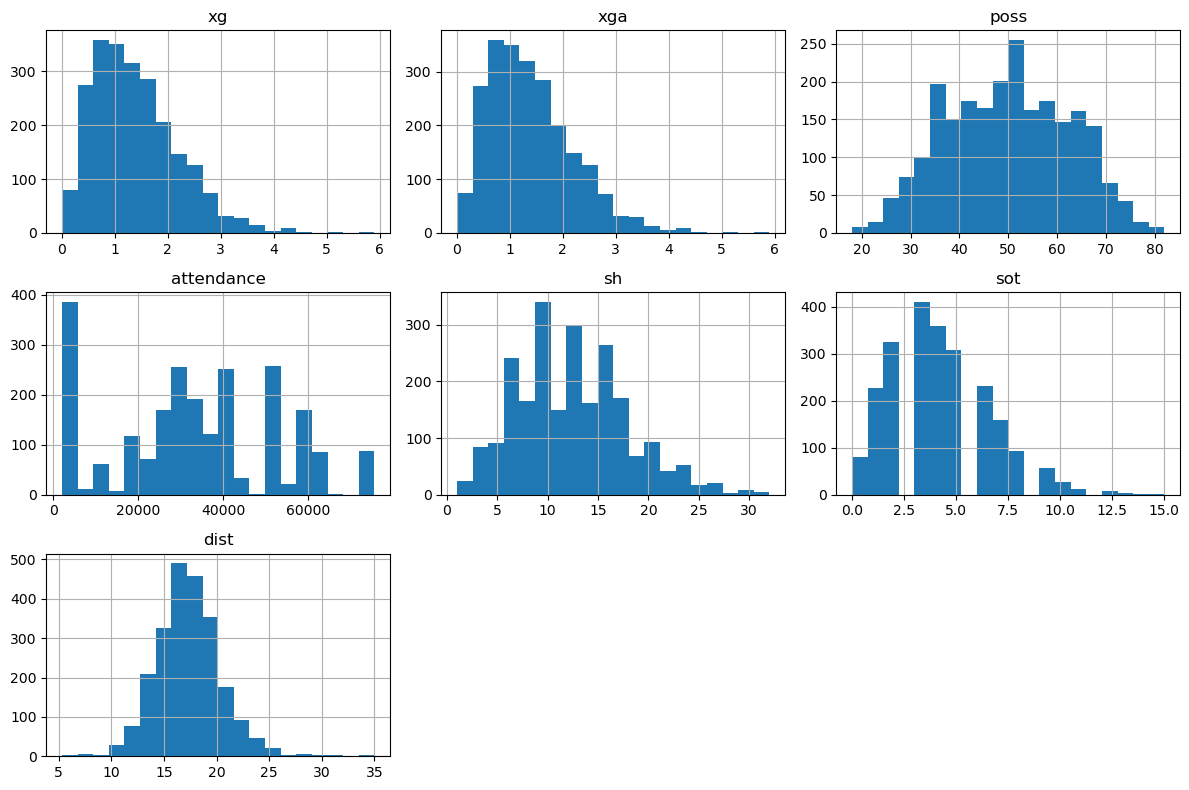

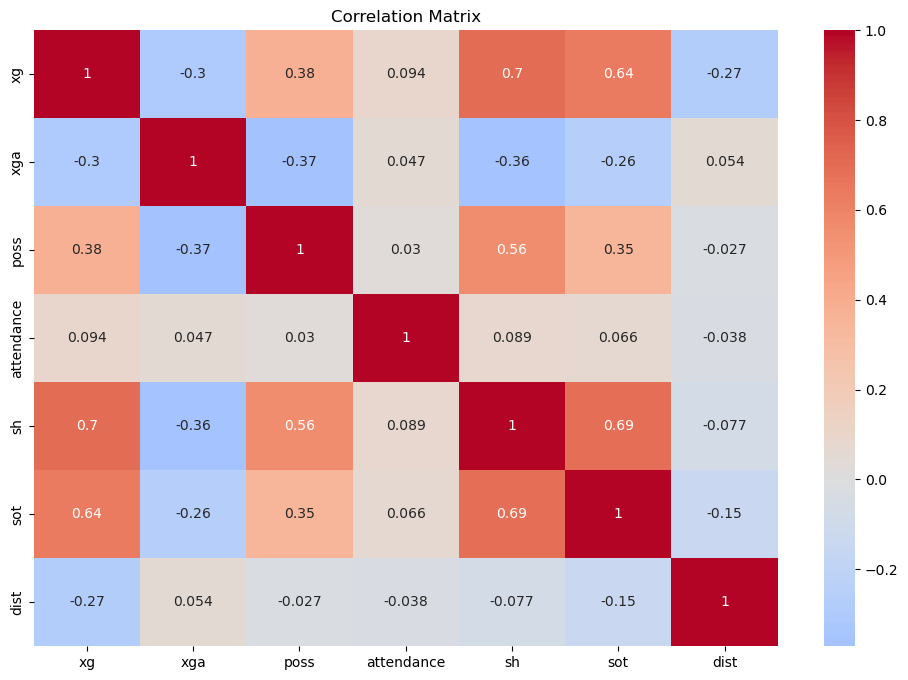

1837 1837 467 467


In [7]:
#reading and laading the data
dataset = pd.read_csv("matchees2.csv", index_col=0)

#initializing module imports
preprocessing = Preprocessing(dataset)

preprocessing.fix_dataset_index()
preprocessing.convert_date_to_datetime("date")
preprocessing.remove_data_values("2020-01-01")

print("<---------------Missing values before temporal imputation---------------->")
# preprocessing.check_missing_values()

preprocessing.drop_columns(["comp", "notes", "match report"])
dataset = preprocessing.perform_temporal_imputation("attendance")
dataset = preprocessing.perform_temporal_imputation_away("attendance")

print("<---------------Missing values after temporal imputation---------------->")
# preprocessing.check_missing_values() 

preprocessing.drop_rows_with_missing_values()
print("<---------------Missing values after dropping rows with missing values---------------->")
# preprocessing.check_missing_values() 

preprocessing.perform_label_column_encoding(categorical_cols)

preprocessing.plot_distributions(numerical_cols) #plotting the distributions of the numerical columns to ascertain if gaussian or not

preprocessing.plot_correlation_matrix(numerical_cols) #plotting the correlation matrix to ascertain if there is a correlation between the numerical columns

preprocessing.perform_normalization(["dist", "poss"], type_="standard") #performing standard normalization on the numerical columns that follow a gaussian distribution

preprocessing.perform_normalization([item for item in numerical_cols if item not in ["dist", "poss"]], type_="minmax") #performing minmax normalization on the numerical columns that do not follow a gaussian distribution

X_train, y_train, X_test, y_test = preprocessing.split_dataset(features)
print(len(X_train), len(y_train), len(X_test), len(y_test))